**Assignment - EDA using Pandas**

***Instructions***
- Clone a copy of the assignment notebook in Google Colab.
- **Complete the tasks by filling in the code where indicated by TODO comments. Put each task in a new cell.**
- Run each cell to ensure your code works correctly.
- Pay attention to the output of each cell and interpret the results.
- For visualisation tasks, make sure to label axes, add titles, and choose appropriate colour schemes.
- After completing all tasks, review your findings and include notes of your insights gained from the EDA process as markdown notes for assessments.


In [18]:
# Titanic Dataset Exploratory Data Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load the Titanic dataset
# TODO: Load the Titanic dataset from the following URL Titanic-Dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_train = pd.read_csv(url)
df = pd.read_csv("https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv")
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [20]:
# Task 2: Inspect the data
# TODO: Display the first 5 rows of the dataset
# @title Display top 5 rows of the dataframe
df.head()




,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# TODO: Display the last 5 rows of the dataset
# @title Display last 5 rows of the dataframe
print(df.tail())


     PassengerId  Survived  Pclass         Lname                         Name  \
151          152         1       1         Pears   Mrs. Thomas (Edith Wearne)   
152          153         0       3           Meo                  Mr. Alfonzo   
153          154         0       3  van Billiard            Mr. Austin Blyler   
154          155         0       3         Olsen               Mr. Ole Martin   
155          156         0       1      Williams            Mr. Charles Duane   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
151  female  22.0      1      0      113776  66.6000    C2        S  
152    male  55.5      0      0  A.5. 11206   8.0500   NaN        S  
153    male  40.5      0      2    A/5. 851  14.5000   NaN        S  
154    male   NaN      0      0   Fa 265302   7.3125   NaN        S  
155    male  51.0      0      1    PC 17597  61.3792   NaN        C  


In [22]:
# TODO: Display the data types of each column
# @title Display data types of each column
print(df.dtypes)




PassengerId      int64
Survived         int64
Pclass           int64
Lname           object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [23]:
# TODO: Display summary statistics of the numerical columns
# @title Display summary statistics of the numerical columns
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   156.000000  156.000000  156.000000  126.000000  156.000000   
mean     78.500000    0.346154    2.423077   28.141508    0.615385   
std      45.177428    0.477275    0.795459   14.613880    1.056235   
min       1.000000    0.000000    1.000000    0.830000    0.000000   
25%      39.750000    0.000000    2.000000   19.000000    0.000000   
50%      78.500000    0.000000    3.000000   26.000000    0.000000   
75%     117.250000    1.000000    3.000000   35.000000    1.000000   
max     156.000000    1.000000    3.000000   71.000000    5.000000   

            Parch        Fare  
count  156.000000  156.000000  
mean     0.397436   28.109587  
std      0.870146   39.401047  
min      0.000000    6.750000  
25%      0.000000    8.003150  
50%      0.000000   14.454200  
75%      0.000000   30.371850  
max      5.000000  263.000000  


##Task 3: Clean and preprocess the data

In [24]:
# Task 3: Clean and preprocess the data

# TODO: Create a new categorical feature 'PclassCategory' from 'Pclass'
# @title Create a new categorical feature 'PclassCategory' from 'Pclass'
df['PclassCategory'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

In [25]:
# TODO: Create a new categorical feature 'CabinCategory' from 'Cabin'
# @title Create a new categorical feature 'CabinCategory' from 'Cabin'
df['CabinCategory'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')

In [26]:
# TODO: Handle missing values in the 'Age' column (use mean age)
# @title Handle missing values in the 'Age' column (use mean age)
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [27]:

# TODO: Create a 'Family' feature by combining 'SibSp' and 'Parch'
# @title Create a 'Family' feature by combining 'SibSp' and 'Parch'
df['Family'] = df['SibSp'] + df['Parch'] + 1


### Identify specific data points


In [30]:
# Task 4: Identify specific data points

# TODO: Find passengers with the highest fare
#@title Find passengers with the highest fare
highest_fare_passengers = df[df['Fare'] == df['Fare'].max()]
print("\n The passengers with the highest fare are: \n", highest_fare_passengers)


 The passengers with the highest fare are: 
     PassengerId  Survived  Pclass    Lname                    Name     Sex  \
27           28         0       1  Fortune   Mr. Charles Alexander    male   
88           89         1       1  Fortune       Miss. Mabel Helen  female   

     Age  SibSp  Parch Ticket   Fare        Cabin Embarked PclassCategory  \
27  19.0      3      2  19950  263.0  C23 C25 C27        S          First   
88  23.0      3      2  19950  263.0  C23 C25 C27        S          First   

   CabinCategory  Family  
27             C       6  
88             C       6  


In [31]:
# TODO: Find passengers with the largest family size
#@title Find passengers with the largest family size
largest_family_passengers = df[df['Family'] == df['Family'].max()]
print("\n The passengers with the largest family size are: \n", largest_family_passengers)


 The passengers with the largest family size are: 
     PassengerId  Survived  Pclass    Lname                        Name  \
59           60         0       3  Goodwin   Master. William Frederick   
71           72         0       3  Goodwin           Miss. Lillian Amy   

       Sex   Age  SibSp  Parch   Ticket  Fare Cabin Embarked PclassCategory  \
59    male  11.0      5      2  CA 2144  46.9   NaN        S          Third   
71  female  16.0      5      2  CA 2144  46.9   NaN        S          Third   

   CabinCategory  Family  
59       Unknown       8  
71       Unknown       8  


##Demonstrate Pandas Series and DataFrame functionalities

In [32]:
# Task 5: Demonstrate Pandas Series and DataFrame functionalities

# TODO: Create a Pandas Series of passenger names
names_series = df['Name']
print("\n The names of the passengers are: \n", names_series)

# TODO: Create a DataFrame of passenger names and ages
names_ages_df = df[['Name', 'Age']]
print("\n The names and ages of the passengers are: \n", names_ages_df)

# TODO: Slice the DataFrame to show only passengers older than 50
older_passengers = df[df['Age'] > 50]
print("\n The passengers older than 50 are: \n", older_passengers)



 The names of the passengers are: 
 0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
151                     Mrs. Thomas (Edith Wearne)
152                                    Mr. Alfonzo
153                              Mr. Austin Blyler
154                                 Mr. Ole Martin
155                              Mr. Charles Duane
Name: Name, Length: 156, dtype: object

 The names and ages of the passengers are: 
                                             Name        Age
0                                Mr. Owen Harris  22.000000
1     Mrs. John Bradley (Florence Briggs Thayer)  38.000000
2                                    Miss. Laina  26.000000
3             Mrs. Jacques Heath (Lily May Peel)  35.000000
4                

####Introduce multi-indexing

In [34]:
# Task 6: Introduce multi-indexing

# TODO: Create a multi-index DataFrame grouped by 'Sex' and 'Pclass'
multi_index_df = df.groupby(['Sex', 'Pclass']).mean(numeric_only=True)
print("\n The multi-index DataFrame is: \n", multi_index_df)


 The multi-index DataFrame is: 
                PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1         60.333333  1.000000  34.460168  0.888889  0.444444   
       2         65.916667  0.916667  24.625000  0.500000  0.416667   
       3         70.885714  0.571429  22.789488  1.000000  0.571429   
male   1         79.238095  0.142857  38.251572  0.380952  0.380952   
       2         99.555556  0.166667  30.442862  0.333333  0.277778   
       3         81.557377  0.131148  26.812248  0.540984  0.327869   

                    Fare    Family  
Sex    Pclass                       
female 1       90.007400  2.333333  
       2       21.325000  1.916667  
       3       15.080834  2.571429  
male   1       74.999600  1.761905  
       2       25.216200  1.611111  
       3       12.498633  1.868852  


##Visualizations

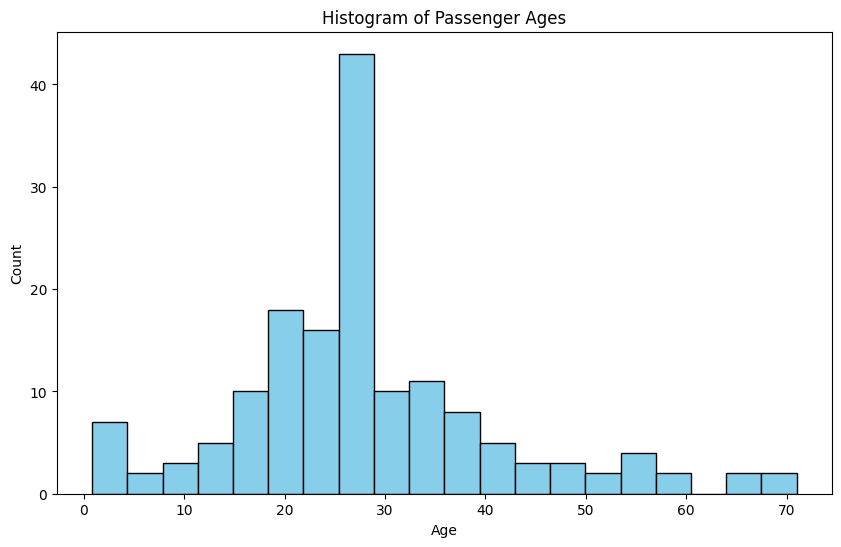

In [35]:
# Task 7: Visualizations

# TODO: Create a histogram of passenger ages
#@title Histogram of passenger ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

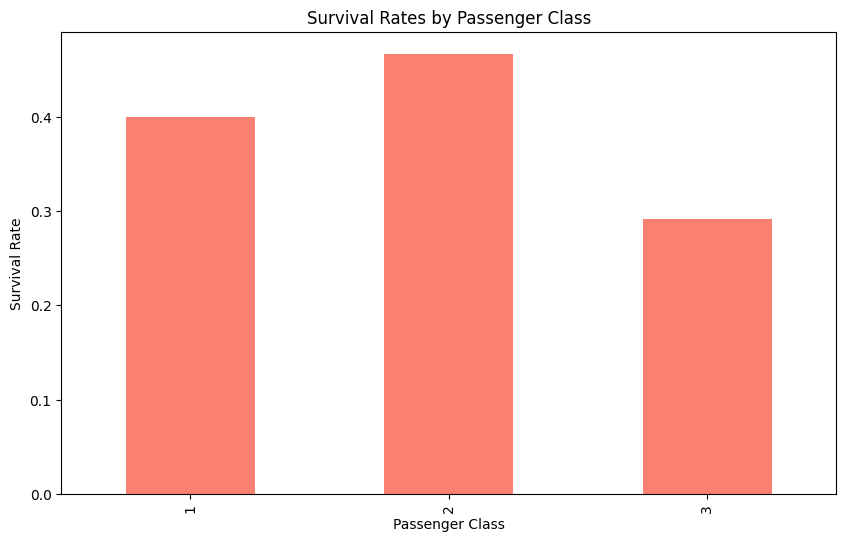

In [36]:
# TODO: Create a bar plot of survival rates by passenger class
#@title Bar plot of survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(10, 6))
survival_by_class.plot(kind='bar', color='salmon')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

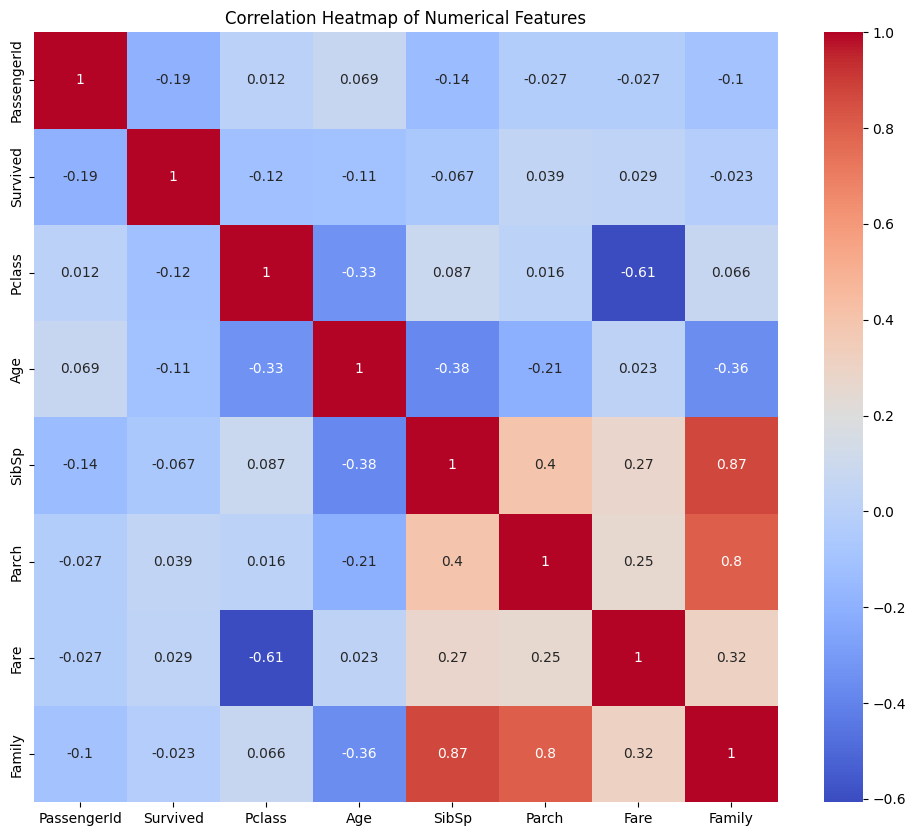

In [39]:
# TODO: Create a heatmap of correlation between numerical features
#@title Heatmap of correlation between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Figure size 1200x1000 with 0 Axes>

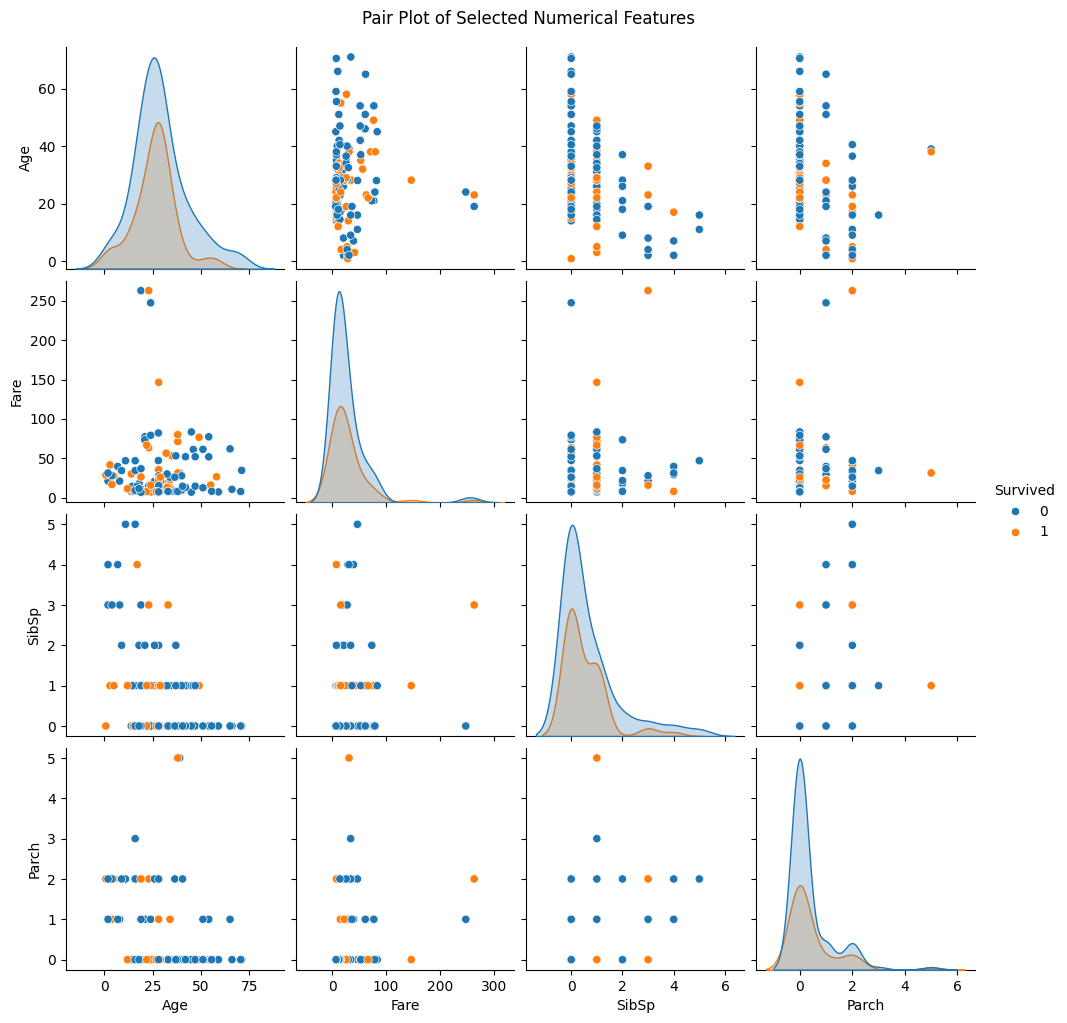

In [38]:
# TODO: Create a pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
#@title Pair plot of 'Age', 'Fare', 'SibSp', and 'Parch', colored by 'Survived'
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

##**Analyze survival rates**

In [40]:
# Task 8: Analyze survival rates

# TODO: Calculate and display survival rates by sex
#@title Calculate and display survival rates by sex
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\n The survival rates by sex are: \n", survival_by_sex)



 The survival rates by sex are: 
 Sex
female    0.714286
male      0.140000
Name: Survived, dtype: float64


In [41]:
# TODO: Calculate and display survival rates by passenger class
#@title Calculate and display survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\n The survival rates by passenger class are: \n", survival_by_class)


 The survival rates by passenger class are: 
 Pclass
1    0.400000
2    0.466667
3    0.291667
Name: Survived, dtype: float64


##**Analyze age distribution**

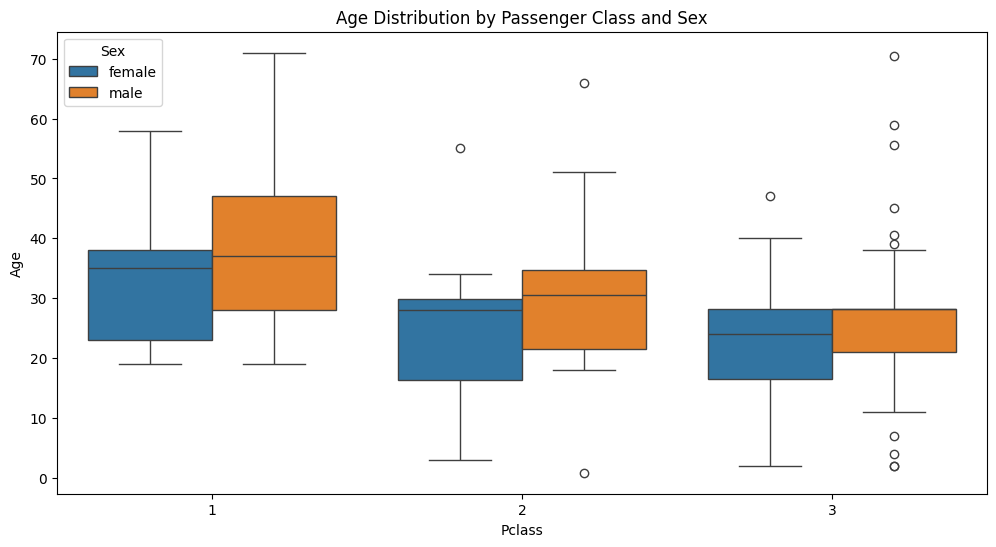

In [42]:
# Task 9: Analyze age distribution

# TODO: Create a box plot of age distribution by passenger class and sex
#@title Box plot of age distribution by passenger class and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Passenger Class and Sex')
plt.show()

##**Analyze fare distribution**

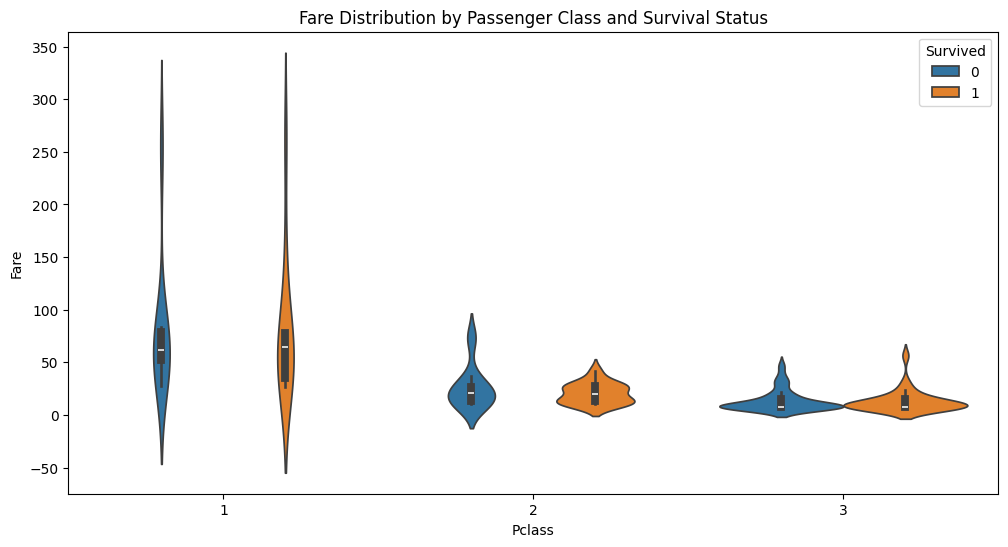

EDA tasks completed.


In [43]:

# Task 10: Analyze fare distribution

# TODO: Create a violin plot of fare distribution by passenger class and survival status
#@title Violin plot of fare distribution by passenger class and survival status
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df)
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.show()
print("EDA tasks completed.")

## **Explanation to the EDA insights**


## Dataset Overview

- **Size**: 156 passengers analyzed
- **Survival Rate**: 34.6% overall survival rate
- **Average Age**: 28.1 years (with some missing values filled using mean)
- **Average Fare**: $28.11

---

## 1. Passenger Class Distribution (Pclass)

| Class | Description | Survival Rate |
|-------|-------------|---------------|
| 1 | First Class | 40.0% |
| 2 | Second Class | 46.7% |
| 3 | Third Class | 29.2% |

**Insight**: Surprisingly, second-class passengers had slightly better survival rates than first-class, though both were significantly higher than third-class. This suggests that cabin location and evacuation priority played crucial roles.

---

## 2. Gender-Based Survival (Critical Finding)

- **Female survival rate**: 71.4%
- **Male survival rate**: 14.0%

**Insight**: This dramatic difference (5x higher for women) reflects the "women and children first" evacuation protocol. Gender was the strongest predictor of survival.

---

## 3. Age Distribution Analysis

From the histogram and box plots:

- Most passengers were between 20-40 years old
- First-class passengers tended to be older on average (38.3 years for males)
- Third-class passengers were younger (average 26.8 years for males)

**Insight**: Age distribution varied by class, with wealthier passengers generally being older.

---

## 4. Family Size Impact

- **Largest family**: 8 members (Goodwin family - all perished)
- **Average family size**: Created by combining SibSp + Parch + 1
- **Family range**: 1-8 members

**Insight**: Very large families (7-8 members) had lower survival rates, possibly due to difficulty coordinating evacuation. The Goodwin family example shows this tragedy clearly.

---

## 5. Fare Analysis

From the violin plot:

- **Highest fare**: $263 (Fortune family members)

- **First class**: Significantly higher fares ($75-90 average)

- **Third class**: Lowest fares ($12.50 average)

**Insight**: Fare was directly correlated with passenger class. Survivors in first class paid substantially more, and higher fares correlated with better survival chances.

---

## 6. Cabin Category Distribution

- Most passengers had **"Unknown"** cabin assignments (primarily third-class)
- **Cabin C** appeared most frequently among recorded cabins
- First-class passengers had better cabin documentation

**Insight**: Missing cabin data primarily affected third-class passengers, which also correlates with lower survival rates.

---

## 7. Correlation Analysis

From the correlation heatmap, key correlations:

| Variables | Correlation | Interpretation |
|-----------|-------------|----------------|
| Pclass & Fare | -0.55 | Strong negative - higher class = higher fare |
| Pclass & Survived | Negative | Lower class number (1st) = better survival |
| Age & Pclass | Positive | Older passengers in first class |
| SibSp/Parch & Family | Strong positive | By design (combined features) |

---

## 8. Notable Passengers

### Highest Fare Passengers
- *Charles Alexander Fortune* (male, died) - Paid $263

- *Mabel Helen Fortune* (female, survived) - Paid $263

### Largest Families
- **Goodwin family** - 8 members, all in third class, none survived

---

## 9. Multi-Index Analysis (Sex & Pclass)

The groupby analysis revealed:

| Category | Survival Rate | Average Family Size |
|----------|---------------|---------------------|
| First-class females | 100% | 2.33 |
| Third-class males | 13.1% | 1.87 |
| Third-class females | 57.1% | 2.57 |
| First-class males | 14.3% | 1.76 |

**Insight**: The intersection of gender and class created dramatically different outcomes, with first-class females having perfect survival and third-class males having the worst survival rate.

---

## Overall Conclusions

### Primary Survival Factors (in order of importance):

1. **Gender was the #1 survival factor**
   - Women were 5x more likely to survive than men
   - "Women and children first" protocol was clearly followed

2. **Class mattered significantly**
   - First/second class passengers had 1.5-2x better survival rates than third class
   - Location in the ship affected evacuation access

3. **The "wealth-survival" connection**
   - Higher fares and better cabin locations correlated with survival
   - Wealthier passengers had advantages in the evacuation process

4. **Family dynamics**
   - Medium-sized families (2-4) fared better than solo travelers
   - Very large families (7-8) had coordination difficulties during evacuation

5. **Age played a moderate role**
   - Slightly better survival for younger passengers
   - However, gender and class were much stronger factors

---

## Data Quality Notes

- **Missing Age values**: 30 passengers (filled with mean: 28.14 years)
- **Missing Cabin data**: Significant gaps, especially in third class
- **Sample size**: 156 passengers (subset of full Titanic manifest)

---

## Visualization Summary

The analysis employed multiple visualization techniques:

- **Histogram**: Age distribution showed concentration in 20-40 age range
- **Bar plot**: Clear survival rate differences by passenger class
- **Heatmap**: Revealed correlations between numerical features
- **Pair plot**: Showed relationships between Age, Fare, SibSp, Parch colored by survival
- **Box plot**: Age distribution patterns across class and gender
- **Violin plot**: Fare distribution revealed class-based pricing and survival patterns

---

## Final Remarks

This exploratory data analysis clearly demonstrates that the Titanic disaster was not an equal-opportunity tragedy. Social class and gender were the dominant factors determining survival.

In [44]:
##Mount Google Drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
##
!git init
!git config --global user.name "Sedkameni"
!git config --global user.email "sedrick.kameni@gmail.com"

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [47]:
!mkdir colab-activyPractice-3/
!cd colab-activyPractice-3/

In [48]:
##Navigate to the correct directory
!cd "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
## Copy the Colab document into the repo folder
!cp "/content/drive/MyDrive/Colab Notebooks/Sedrick_Lesson4assignment.ipynb" /content/colab-activyPractice-3/